In [7]:
# Cell 1: Imports & Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("../data/raw/gun_vs_ball.csv")

# FILTER: True Gamers only
df_clean = df[(df['playtime'] > 0) & (df['metacritic'].notna())].copy()

# Filter for the "Civil War" (Gun vs Ball)
df_civil_war = df_clean[df_clean['category'].isin(['Gun', 'Ball'])].copy()

In [4]:
# Cell 2: The Head-to-Head Stats Table
# We aggregate to see the direct winner
comparison = df_civil_war.groupby('category').agg({
    'metacritic': 'mean',       # Quality
    'rating': 'mean',           # Enjoyment
    'playtime': 'mean',         # Addiction (Avg)
    'ratings_count': 'mean'     # Popularity
}).round(2)

print("=== THE TALE OF THE TAPE ===")
print(comparison)

=== THE TALE OF THE TAPE ===
          metacritic  rating  playtime  ratings_count
category                                             
Ball           73.85    2.93     14.23         117.24
Gun            72.98    3.38      5.50         514.41


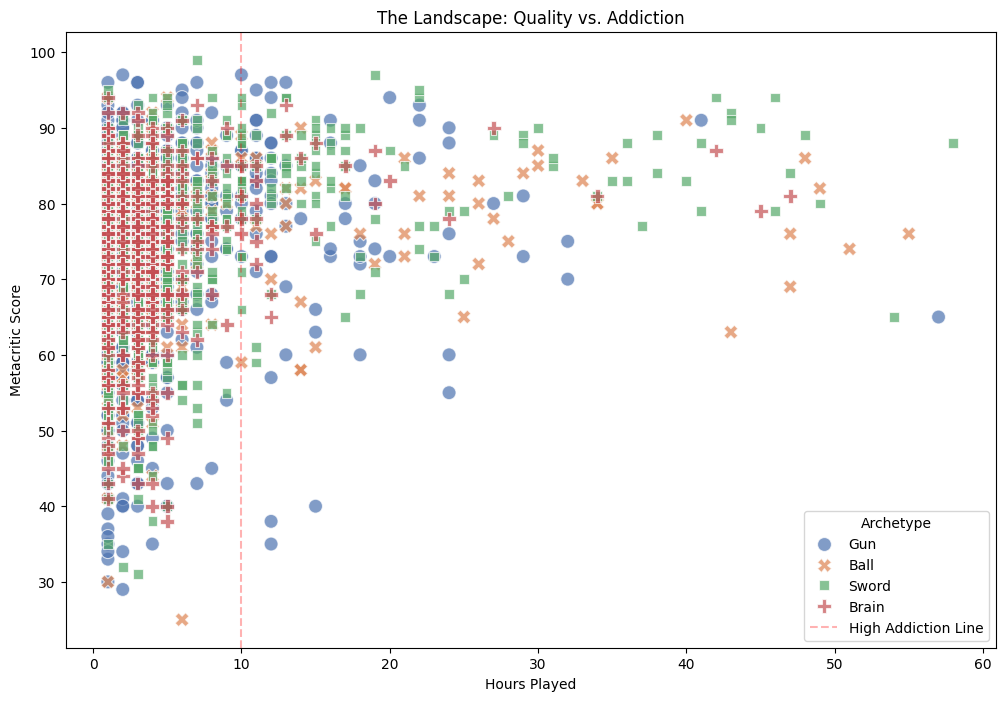

In [5]:
# Cell 3: The Quadrant of Misery (Scatter Plot)
# Visualizing the relationship between Playtime and Quality
plt.figure(figsize=(12, 8))

# We include Sword (RPG) and Brain (Strategy) for context
big_4 = ['Gun', 'Ball', 'Sword', 'Brain']
df_context = df_clean[df_clean['category'].isin(big_4)]

# Remove extreme outliers (>60 hours) for readability
sns.scatterplot(
    data=df_context[df_context['playtime'] < 60], 
    x='playtime', 
    y='metacritic', 
    hue='category', 
    style='category',
    s=100, 
    alpha=0.7,
    palette="deep"
)

plt.title("The Landscape: Quality vs. Addiction")
plt.xlabel("Hours Played")
plt.ylabel("Metacritic Score")
plt.axvline(x=10, color='red', linestyle='--', alpha=0.3, label='High Addiction Line')
plt.legend(title='Archetype')
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_31040\3577722836.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_civil_war, x='category', y='Misery_Index', palette="magma")


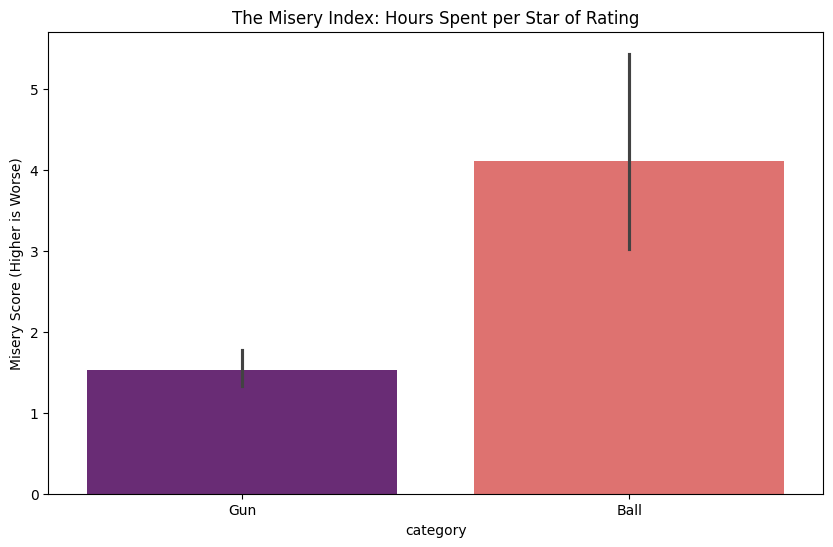

In [6]:
# Cell 4: The Misery Index (Derived Metric)
# Ratio of Playtime to Rating. High number = High Playtime / Low Rating (Bad)
df_civil_war['Misery_Index'] = df_civil_war['playtime'] / df_civil_war['rating']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_civil_war, x='category', y='Misery_Index', palette="magma")
plt.title("The Misery Index: Hours Spent per Star of Rating")
plt.ylabel("Misery Score (Higher is Worse)")
plt.show()